# 데이터

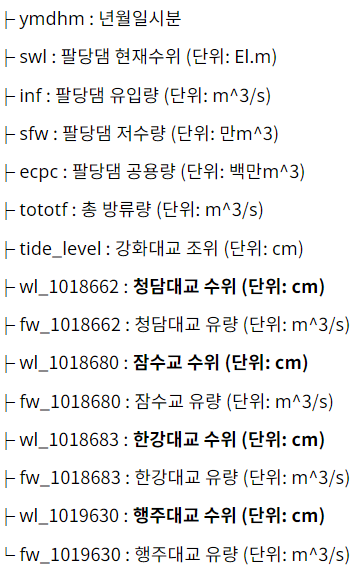

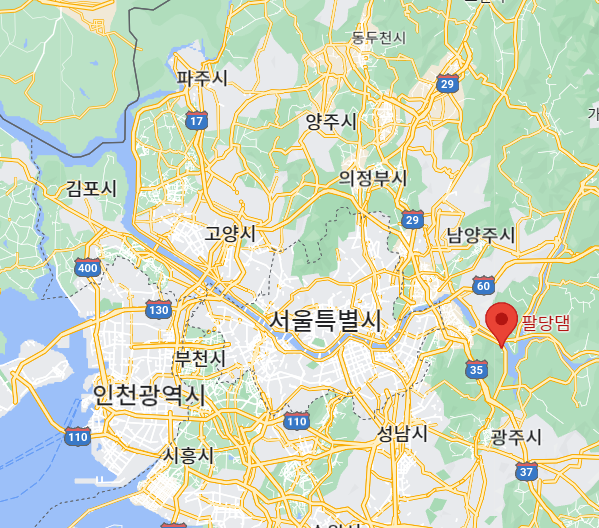

* 공용량
   * 홍수기 제한수위(제한수위) ~ 상시만수위(저수지의 이수목적으로 활용되는 부분의 최고수위)사이의 용량
* 조위 : 풍랑or놀,항만의 고유진동 등에 의한 단주기의 해면 승강을 제외하고 일정한 기준면에서 해면을 측정했을 때의 높이

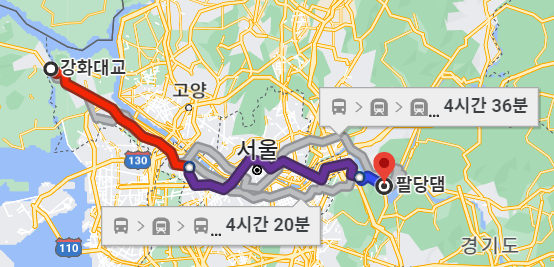

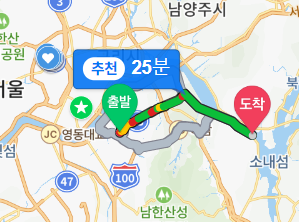

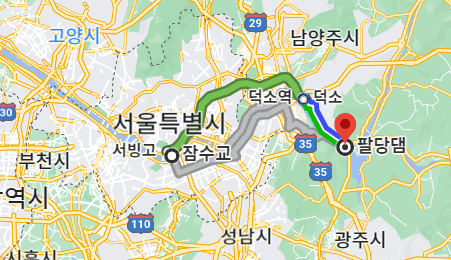

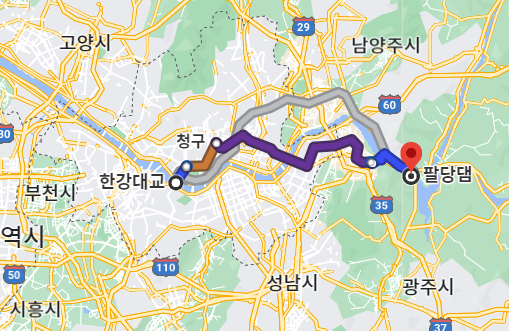

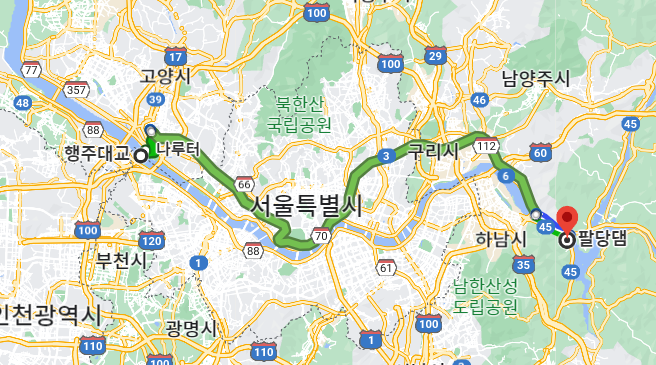

# 폴리움

## 설치

In [ ]:
!pip install folium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import folium
folium.__version__

'0.12.1.post1'

In [ ]:
import pandas as pd

In [ ]:
library = pd.read_csv('/content/drive/Shareddrives/팔당댐/Code/folium/다리 및 댐_위치데이터.csv')

In [ ]:
library

,Bridge,경도,위도,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,강화대교,37.734127,126.521599,NaN,NaN,NaN,NaN
1,청담대교,37.523610,127.063150,NaN,NaN,NaN,NaN
2,잠수교,37.514091,126.997568,NaN,NaN,NaN,NaN
3,한강대교,37.519936,126.960335,NaN,NaN,NaN,NaN
4,행주대교,37.599123,126.810126,NaN,NaN,NaN,NaN
5,팔당댐,37.525453,127.278368,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
from folium import Marker


library=library.dropna(subset=['위도'])
library=library.dropna(subset=['경도'])
library=library.dropna(subset=['Bridge'])

library = library.drop(['Unnamed: 3'], axis = 1)
library = library.drop(['Unnamed: 4'], axis = 1)
library = library.drop(['Unnamed: 5'], axis = 1)
library = library.drop(['Unnamed: 6'], axis = 1)

In [ ]:
library

,Bridge,경도,위도
0,강화대교,37.734127,126.521599
1,청담대교,37.523610,127.063150
2,잠수교,37.514091,126.997568
3,한강대교,37.519936,126.960335
4,행주대교,37.599123,126.810126
5,팔당댐,37.525453,127.278368


In [ ]:
library = library.drop_duplicates()

In [ ]:
library

,Bridge,경도,위도
0,강화대교,37.734127,126.521599
1,청담대교,37.523610,127.063150
2,잠수교,37.514091,126.997568
3,한강대교,37.519936,126.960335
4,행주대교,37.599123,126.810126
5,팔당댐,37.525453,127.278368


In [ ]:
library.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6 entries, 0 to 5
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Bridge  6 non-null      object 
 1   경도      6 non-null      float64
 2   위도      6 non-null      float64
dtypes: float64(2), object(1)
memory usage: 192.0+ bytes


In [ ]:
import json
from tqdm import tqdm 

import folium
mapping = folium.Map(location=[37.5502, 126.982], zoom_start=11)

In [ ]:
# marker:일반 마커 해당위치 포인팅
# color = ['red','blue','green','white','gray','purple']

for idx, row in tqdm(library.iterrows()):
  if row["Bridge"] == "팔당댐":
    check_color = 'blue'
  else:
     check_color = 'red'
     
  folium.Marker(
            location=[row["경도"], row["위도"]],
            tooltip=row["Bridge"],
            icon=folium.Icon(color=check_color,icon='star')
        ).add_to(mapping)
                
mapping

6it [00:00, 2351.73it/s]


# EDA

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import random
import datetime as dt 
import numpy as np 
import pandas as pd 

from tqdm import tqdm
import warnings

In [3]:
load_path = '/content/drive/Shareddrives/팔당댐/competition_data/water_data/' # 데이터 불러오는 경로

In [ ]:
train= pd.read_csv(load_path + 'data_2012.csv')
train= pd.read_csv(load_path + 'data_2013.csv')
train= pd.read_csv(load_path + 'data_2014.csv')
train= pd.read_csv(load_path + 'data_2015.csv')
train= pd.read_csv(load_path + 'data_2016.csv')
train= pd.read_csv(load_path + 'data_2017.csv')
train= pd.read_csv(load_path + 'data_2018.csv')
train= pd.read_csv(load_path + 'data_2019.csv')
train= pd.read_csv(load_path + 'data_2020.csv')
train= pd.read_csv(load_path + 'data_2021.csv')
train= pd.read_csv(load_path + 'data_2022.csv')

## 데이터 소개

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376 entries, 0 to 11375
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ymdhm       11376 non-null  object 
 1   swl         11340 non-null  float64
 2   inf         11340 non-null  float64
 3   sfw         11340 non-null  float64
 4   ecpc        11340 non-null  float64
 5   tototf      11340 non-null  float64
 6   tide_level  11363 non-null  float64
 7   wl_1018662  11376 non-null  float64
 8   fw_1018662  8191 non-null   float64
 9   wl_1018680  11376 non-null  float64
 10  fw_1018680  0 non-null      float64
 11  wl_1018683  11376 non-null  float64
 12  fw_1018683  11376 non-null  float64
 13  wl_1019630  11376 non-null  float64
 14  fw_1019630  11376 non-null  float64
dtypes: float64(14), object(1)
memory usage: 1.3+ MB


In [ ]:
train

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
0,2022-05-01 00:00,25.20,739.36,218.73,25.27,124.36,81.0,290.7,337.64,284.2,NaN,279.0,0.00,269.3,471.08
1,2022-05-01 00:10,25.20,124.48,218.73,25.27,124.48,72.0,291.7,343.69,284.2,NaN,279.0,145.14,266.3,438.33
2,2022-05-01 00:20,25.20,124.20,218.73,25.27,124.20,64.0,290.7,337.64,284.2,NaN,279.0,232.22,264.3,417.17
3,2022-05-01 00:30,25.20,124.35,218.73,25.27,124.35,58.0,289.7,331.65,284.2,NaN,279.0,302.71,263.3,406.79
4,2022-05-01 00:40,25.19,0.00,218.36,25.64,124.42,58.0,287.7,319.84,284.2,NaN,279.0,340.03,264.3,417.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11371,2022-07-18 23:10,25.04,259.23,212.86,31.14,259.23,510.0,0.0,319.84,0.0,NaN,0.0,-456.41,0.0,974.40
11372,2022-07-18 23:20,25.04,260.46,212.86,31.14,260.46,492.0,0.0,314.01,0.0,NaN,0.0,-717.30,0.0,1006.88
11373,2022-07-18 23:30,25.04,259.37,212.86,31.14,259.37,475.0,0.0,387.55,0.0,NaN,0.0,-843.37,0.0,1039.90
11374,2022-07-18 23:40,25.04,259.13,212.86,31.14,259.13,458.0,0.0,454.91,0.0,NaN,0.0,-1023.37,0.0,1073.46


### 결측치 확인

In [ ]:
train.isnull().sum()

ymdhm             0
swl              36
inf              36
sfw              36
ecpc             36
tototf           36
tide_level       13
wl_1018662        0
fw_1018662     3185
wl_1018680        0
fw_1018680    11376
wl_1018683        0
fw_1018683        0
wl_1019630        0
fw_1019630        0
dtype: int64

In [ ]:
train = train.fillna(method='bfill')

In [ ]:
train.isnull().sum()

ymdhm             0
swl               0
inf               0
sfw               0
ecpc              0
tototf            0
tide_level        0
wl_1018662        0
fw_1018662        0
wl_1018680        0
fw_1018680    11376
wl_1018683        0
fw_1018683        0
wl_1019630        0
fw_1019630        0
dtype: int64

In [ ]:
train = train.fillna(train.mean())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


In [ ]:
train = train.fillna(0)

In [ ]:
train.isnull().sum()

ymdhm         0
swl           0
inf           0
sfw           0
ecpc          0
tototf        0
tide_level    0
wl_1018662    0
fw_1018662    0
wl_1018680    0
fw_1018680    0
wl_1018683    0
fw_1018683    0
wl_1019630    0
fw_1019630    0
dtype: int64

In [ ]:
train.corr()

,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630
swl,1.000000,-0.530608,0.999855,-0.999855,-0.603062,-0.103069,0.584273,-0.537633,0.584900,NaN,0.584305,-0.536591,0.583824,-0.568887
inf,-0.530608,1.000000,-0.537511,0.537511,0.916372,0.087466,-0.250035,0.883531,-0.250282,NaN,-0.250127,0.855821,-0.250293,0.856057
sfw,0.999855,-0.537511,1.000000,-1.000000,-0.610589,-0.102576,0.581340,-0.545361,0.581966,NaN,0.581373,-0.544425,0.580891,-0.575595
ecpc,-0.999855,0.537511,-1.000000,1.000000,0.610589,0.102576,-0.581340,0.545361,-0.581966,NaN,-0.581373,0.544425,-0.580891,0.575595
tototf,-0.603062,0.916372,-0.610589,0.610589,1.000000,0.092559,-0.284069,0.945128,-0.284254,NaN,-0.284162,0.917445,-0.284265,0.920991
tide_level,-0.103069,0.087466,-0.102576,0.102576,0.092559,1.000000,-0.077298,0.078358,-0.076295,NaN,-0.076047,-0.014386,-0.072514,0.112585
wl_1018662,0.584273,-0.250035,0.581340,-0.581340,-0.284069,-0.077298,1.000000,-0.230377,0.999827,NaN,0.999762,-0.240420,0.998718,-0.266468
fw_1018662,-0.537633,0.883531,-0.545361,0.545361,0.945128,0.078358,-0.230377,1.000000,-0.230991,NaN,-0.230864,0.903556,-0.232004,0.970179
wl_1018680,0.584900,-0.250282,0.581966,-0.581966,-0.284254,-0.076295,0.999827,-0.230991,1.000000,NaN,0.999902,-0.241004,0.999137,-0.266827
fw_1018680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# 히트맵

In [ ]:
# #한글 글자
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# 브라우저에서 바로 그려지도록 
%matplotlib inline

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

# Colab 의 한글 폰트 설정
plt.rc('font', family='NanumBarunGothic') 

## water_data

### 청담대교 수위 -  wl_1018662 

In [ ]:
heatmap_data = train[["swl","inf","sfw","ecpc","tototf","tide_level","fw_1018662","fw_1018680","fw_1018683","fw_1019630","wl_1018662"]]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


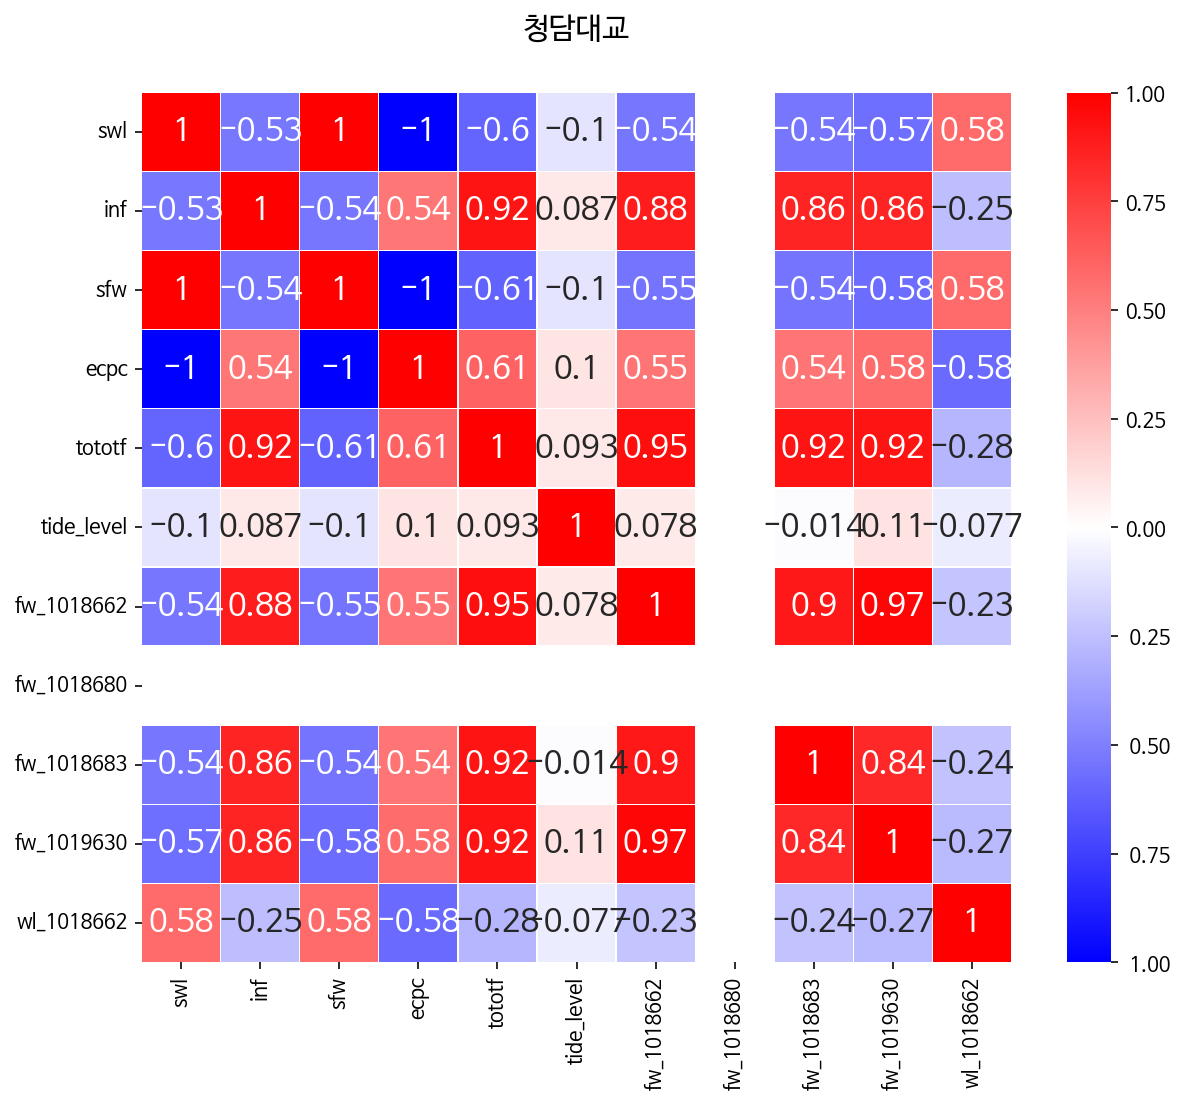

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("청담대교", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'bwr', linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 잠수교 수위 - wl_1018680

In [ ]:
heatmap_data = train[["swl","inf","sfw","ecpc","tototf","tide_level","fw_1018662","fw_1018680","fw_1018683","fw_1019630","wl_1018680"]]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


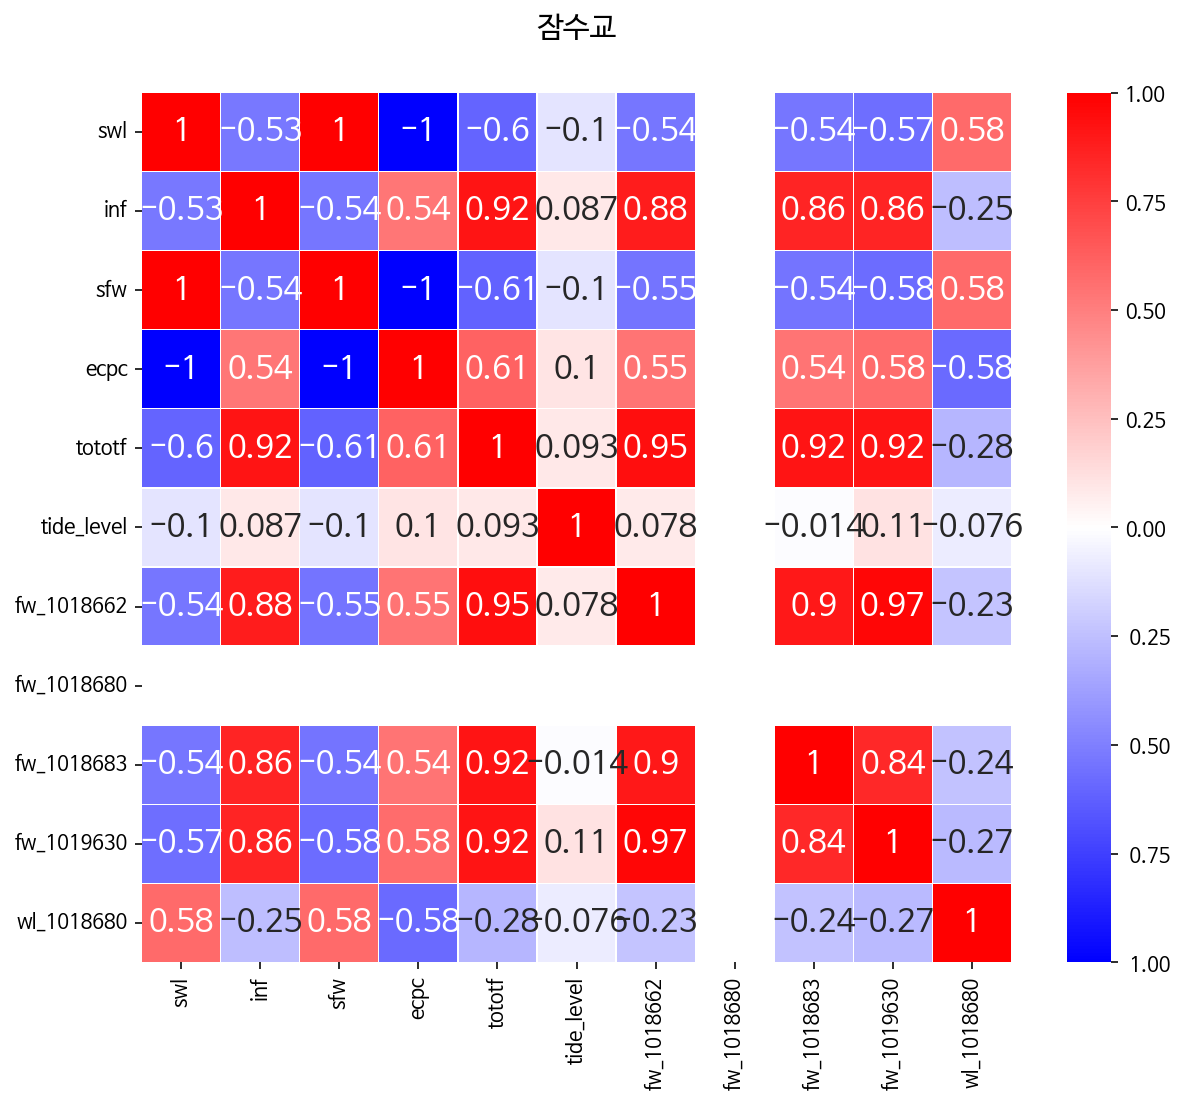

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("잠수교", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'bwr', linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 한강대교 - wl_1018683

In [ ]:
heatmap_data = train[["swl","inf","sfw","ecpc","tototf","tide_level","fw_1018662","fw_1018680","fw_1018683","fw_1019630","wl_1018683"]]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


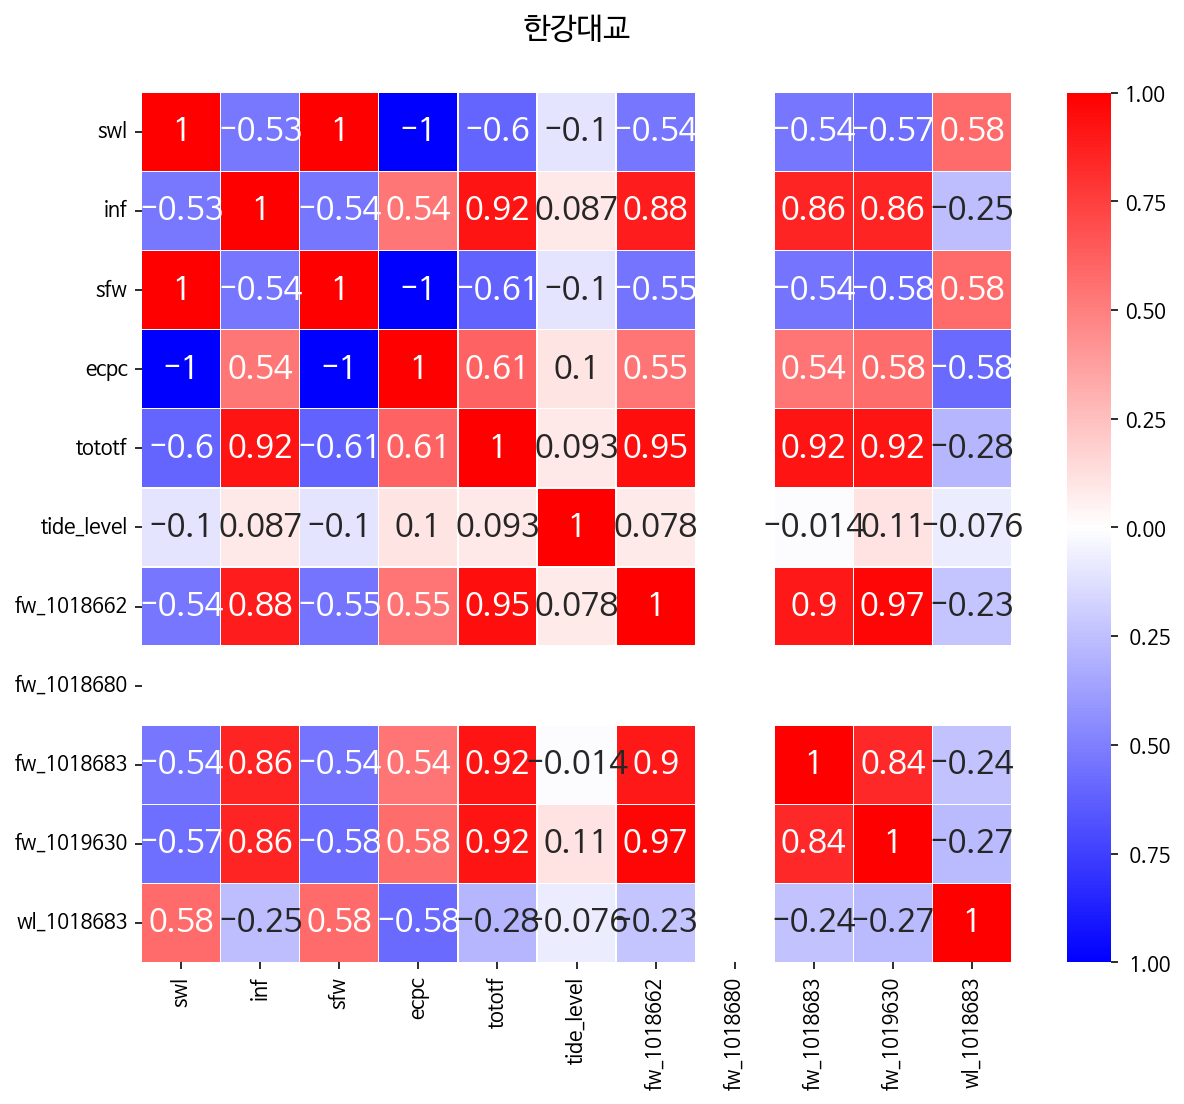

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("한강대교", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'bwr', linecolor = "white", annot = True, annot_kws = {"size" : 16})

### 행주대교 - wl_1019630

In [ ]:
heatmap_data = train[["swl","inf","sfw","ecpc","tototf","tide_level","fw_1018662","fw_1018680","fw_1018683","fw_1019630","wl_1019630"]]

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


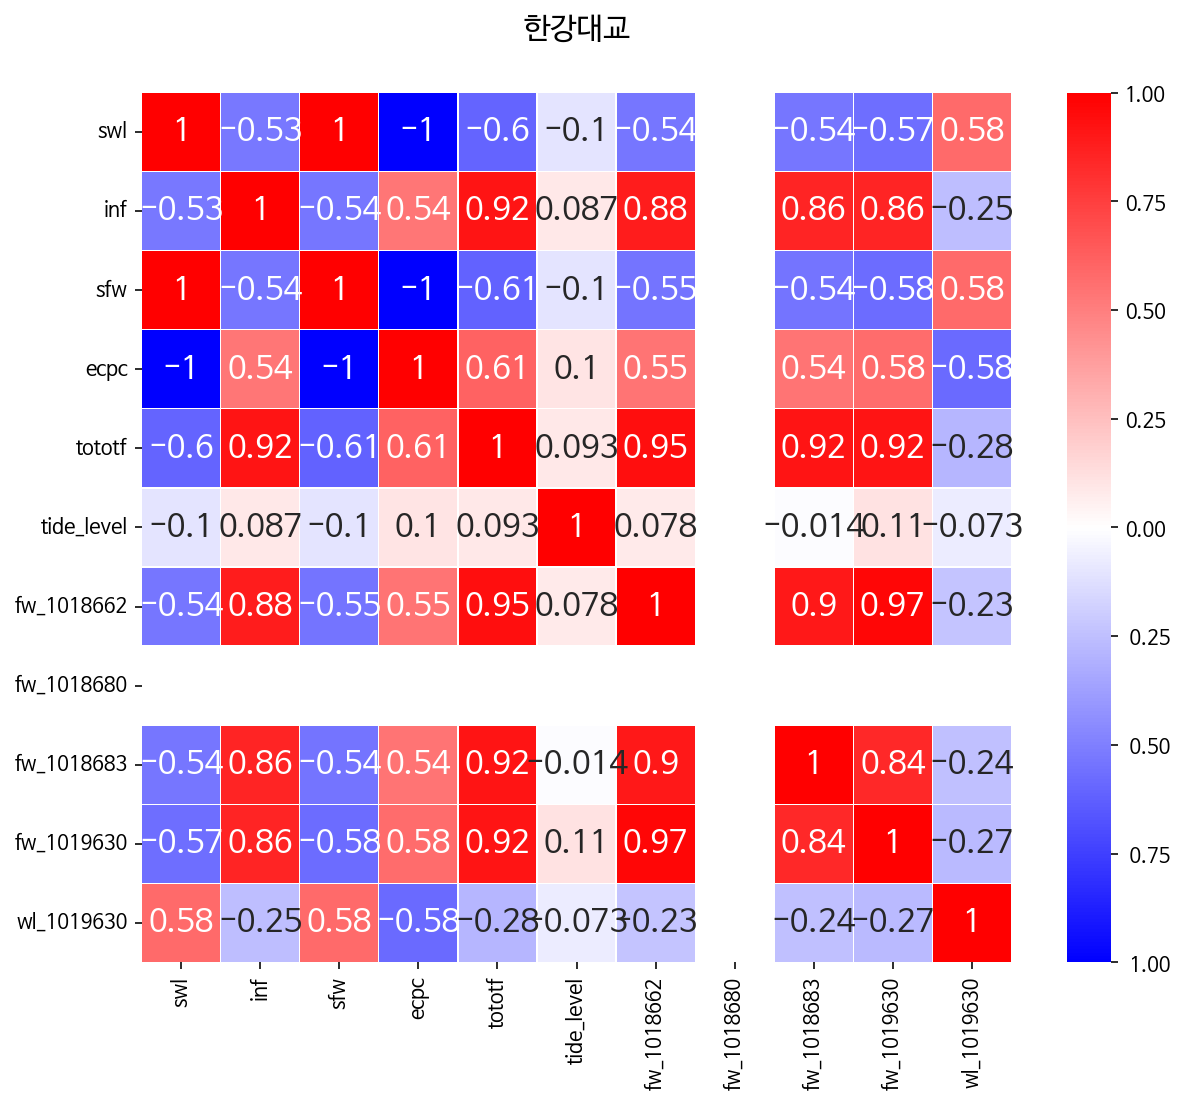

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("한강대교", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'bwr', linecolor = "white", annot = True, annot_kws = {"size" : 16})

## rf_data

In [ ]:
load_path = '/content/drive/Shareddrives/팔당댐/competition_data/rf_data/' # 데이터 불러오는 경로

In [ ]:
rf= pd.read_csv(load_path + 'rf_2012.csv')
rf= pd.read_csv(load_path + 'rf_2013.csv')
rf= pd.read_csv(load_path + 'rf_2014.csv')
rf= pd.read_csv(load_path + 'rf_2015.csv')
rf= pd.read_csv(load_path + 'rf_2016.csv')
rf= pd.read_csv(load_path + 'rf_2017.csv')
rf= pd.read_csv(load_path + 'rf_2018.csv')
rf= pd.read_csv(load_path + 'rf_2019.csv')
rf= pd.read_csv(load_path + 'rf_2020.csv')
rf= pd.read_csv(load_path + 'rf_2021.csv')
rf= pd.read_csv(load_path + 'rf_2022.csv')

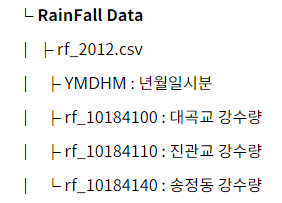

In [ ]:
rf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11376 entries, 0 to 11375
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ymdhm        11376 non-null  object 
 1   rf_10184100  11376 non-null  float64
 2   rf_10184110  11376 non-null  float64
 3   rf_10184140  11376 non-null  float64
dtypes: float64(3), object(1)
memory usage: 355.6+ KB


In [ ]:
rf

,ymdhm,rf_10184100,rf_10184110,rf_10184140
0,2022-05-01 00:00,0.0,0.0,0.0
1,2022-05-01 00:10,0.0,0.0,0.0
2,2022-05-01 00:20,0.0,0.0,0.0
3,2022-05-01 00:30,0.0,0.0,0.0
4,2022-05-01 00:40,0.0,0.0,0.0
...,...,...,...,...
11371,2022-07-18 23:10,0.0,0.0,0.0
11372,2022-07-18 23:20,0.0,0.0,0.0
11373,2022-07-18 23:30,0.0,0.0,0.0
11374,2022-07-18 23:40,0.0,0.0,0.0


In [ ]:
rf.isnull().sum()

ymdhm          0
rf_10184100    0
rf_10184110    0
rf_10184140    0
dtype: int64

In [ ]:
heatmap_data = rf[["rf_10184100","rf_10184110","rf_10184140"]]

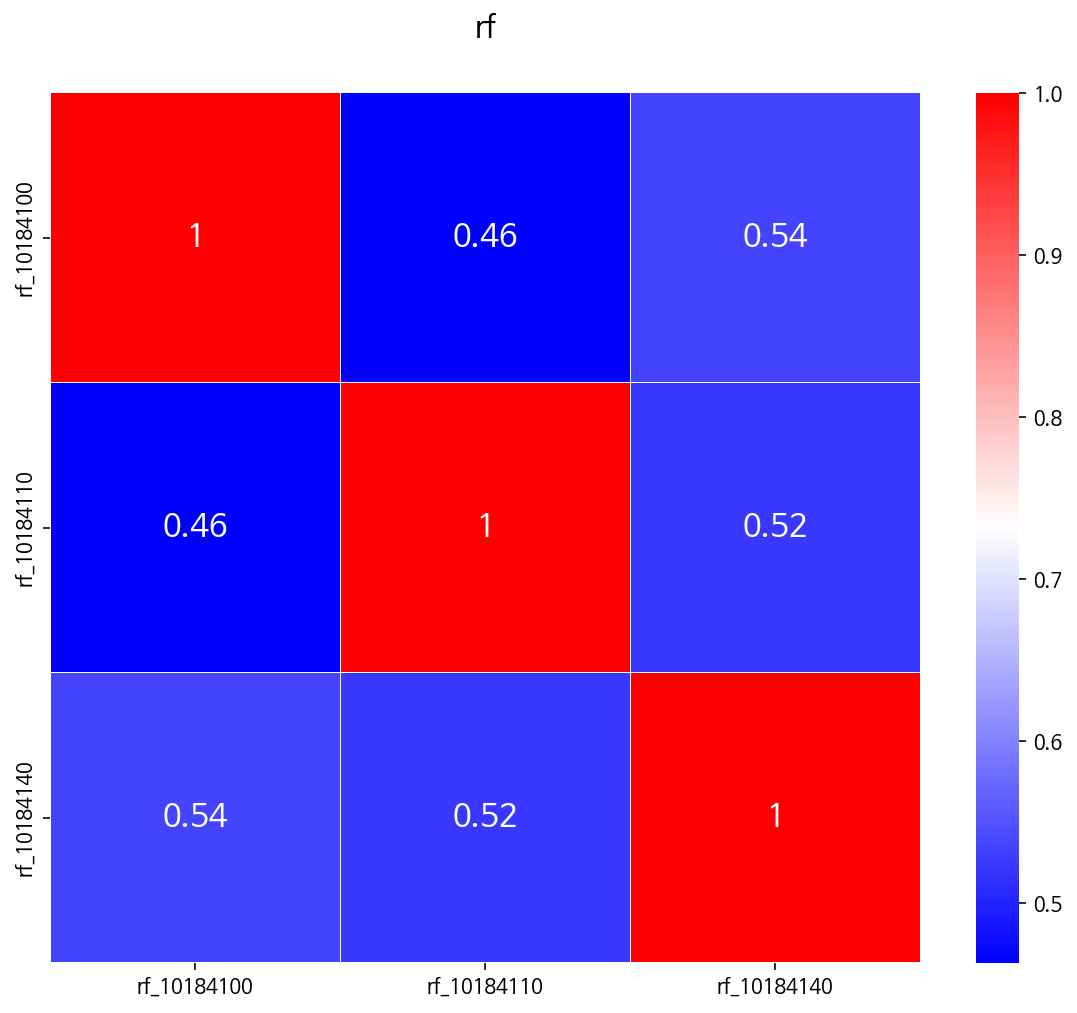

In [ ]:
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("rf", y = 1.05, size = 15) 
sns.heatmap(heatmap_data.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'bwr', linecolor = "white", annot = True, annot_kws = {"size" : 16})

# 다 합친거

In [6]:
CD= pd.read_csv('/content/drive/Shareddrives/팔당댐/combined_data/combined_data.csv')

In [7]:
CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 264960 entries, 0 to 264959
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   ymdhm        264960 non-null  object 
 1   swl          264253 non-null  float64
 2   inf          264253 non-null  float64
 3   sfw          264253 non-null  float64
 4   ecpc         264253 non-null  float64
 5   tototf       264253 non-null  float64
 6   tide_level   260046 non-null  float64
 7   wl_1018662   264901 non-null  float64
 8   fw_1018662   251765 non-null  float64
 9   wl_1018680   264901 non-null  float64
 10  fw_1018680   79487 non-null   float64
 11  wl_1018683   264901 non-null  float64
 12  fw_1018683   263681 non-null  float64
 13  wl_1019630   264901 non-null  float64
 14  fw_1019630   264901 non-null  float64
 15  rf_10184100  264960 non-null  float64
 16  rf_10184110  264960 non-null  float64
 17  rf_10184140  264960 non-null  float64
dtypes: float64(17), object(1

In [8]:
CD

,ymdhm,swl,inf,sfw,ecpc,tototf,tide_level,wl_1018662,fw_1018662,wl_1018680,fw_1018680,wl_1018683,fw_1018683,wl_1019630,fw_1019630,rf_10184100,rf_10184110,rf_10184140
0,2012-05-01 00:00,24.800,555.0,219.07,24.93,555.0,445.0,310.7,469.05,300.2,0.0,290.0,729.80,275.3,540.18,0.0,0.0,0.0
1,2012-05-01 00:10,24.794,464.6,218.86,25.15,562.9,449.0,314.7,498.00,300.2,0.0,290.0,731.48,275.3,540.18,0.0,0.0,0.0
2,2012-05-01 00:20,24.789,478.1,218.69,25.31,576.4,451.0,313.7,490.68,301.2,0.0,290.0,726.42,275.3,540.18,0.0,0.0,0.0
3,2012-05-01 00:30,24.789,464.8,218.69,25.31,563.1,452.0,311.7,476.21,301.2,0.0,290.0,726.42,276.3,552.17,0.0,0.0,0.0
4,2012-05-01 00:40,24.789,478.1,218.69,25.31,576.4,450.0,311.7,476.21,301.2,0.0,291.0,707.17,277.3,564.29,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
264955,2021-10-31 23:10,25.040,56.0,212.86,31.14,157.0,NaN,269.7,NaN,258.2,NaN,265.0,207.27,253.3,310.31,0.0,0.0,0.0
264956,2021-10-31 23:20,25.040,56.0,212.86,31.14,157.0,NaN,270.7,NaN,258.2,NaN,265.0,211.33,254.3,319.36,0.0,0.0,0.0
264957,2021-10-31 23:30,25.040,56.0,212.86,31.14,157.0,NaN,270.7,NaN,258.2,NaN,265.0,219.46,254.3,319.36,0.0,0.0,0.0
264958,2021-10-31 23:40,25.040,56.0,212.86,31.14,157.0,NaN,271.7,NaN,258.2,NaN,265.0,227.59,254.3,319.36,0.0,0.0,0.0


In [9]:
CD.isnull().sum()

ymdhm               0
swl               707
inf               707
sfw               707
ecpc              707
tototf            707
tide_level       4914
wl_1018662         59
fw_1018662      13195
wl_1018680         59
fw_1018680     185473
wl_1018683         59
fw_1018683       1279
wl_1019630         59
fw_1019630         59
rf_10184100         0
rf_10184110         0
rf_10184140         0
dtype: int64

In [10]:
CD = CD.fillna(method='bfill')

In [11]:
CD.isnull().sum()

ymdhm               0
swl                 0
inf                 0
sfw                 0
ecpc                0
tototf              0
tide_level       2536
wl_1018662          0
fw_1018662        503
wl_1018680          0
fw_1018680     185472
wl_1018683          0
fw_1018683          0
wl_1019630          0
fw_1019630          0
rf_10184100         0
rf_10184110         0
rf_10184140         0
dtype: int64

In [12]:
CD = CD.fillna(0)

In [13]:
CD.isnull().sum()

ymdhm          0
swl            0
inf            0
sfw            0
ecpc           0
tototf         0
tide_level     0
wl_1018662     0
fw_1018662     0
wl_1018680     0
fw_1018680     0
wl_1018683     0
fw_1018683     0
wl_1019630     0
fw_1019630     0
rf_10184100    0
rf_10184110    0
rf_10184140    0
dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
CD_drop = CD.drop(['ymdhm'],axis=1)

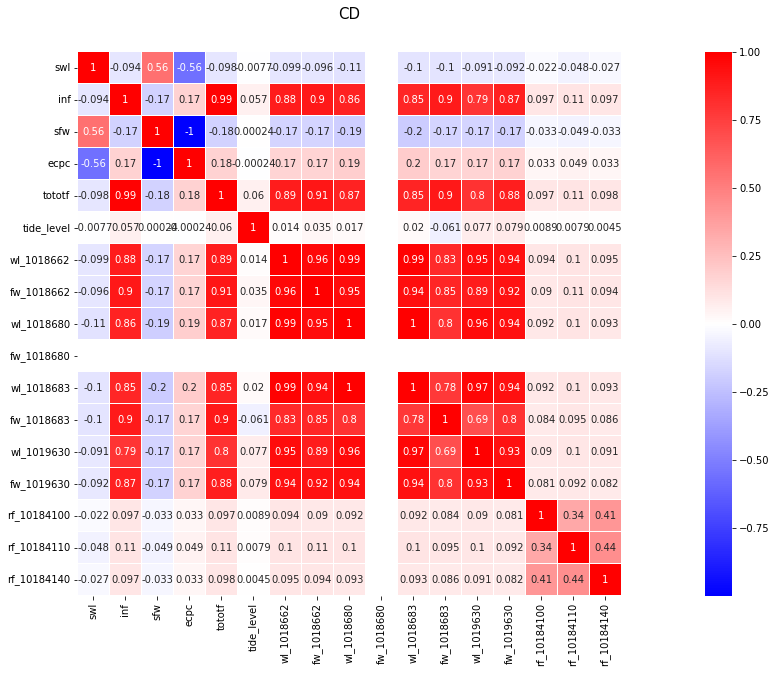

In [25]:
colormap = plt.cm.PuBu
plt.figure(figsize=(30,10))
plt.title("CD", y = 1.05, size = 15) 
sns.heatmap(CD_drop.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = 'bwr', linecolor = "white", annot = True, annot_kws = {"size" : 10})